In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv(r"C:\Users\chand\Downloads\autos.csv",encoding='unicode_escape')
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [3]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

# missing values

In [4]:
df.isna().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            37869
yearOfRegistration         0
gearbox                20209
powerPS                    0
model                  20484
kilometer                  0
monthOfRegistration        0
fuelType               33386
brand                      0
notRepairedDamage      72060
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [5]:
df.drop(['notRepairedDamage'] ,axis = 1 ,inplace = True)

In [6]:
df.dropna(axis = 0 , inplace=True)

In [7]:
df.isna().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
dateCreated            0
nrOfPictures           0
postalCode             0
lastSeen               0
dtype: int64

In [8]:
df.dtypes

dateCrawled            object
name                   object
seller                 object
offerType              object
price                   int64
abtest                 object
vehicleType            object
yearOfRegistration      int64
gearbox                object
powerPS                 int64
model                  object
kilometer               int64
monthOfRegistration     int64
fuelType               object
brand                  object
dateCreated            object
nrOfPictures            int64
postalCode              int64
lastSeen               object
dtype: object

In [9]:
df['lastSeen'].unique()

array(['2016-04-05 12:47:46', '2016-03-17 17:40:17',
       '2016-04-06 10:17:21', ..., '2016-04-02 18:16:20',
       '2016-03-19 20:44:43', '2016-03-29 10:17:23'], dtype=object)

In [10]:
df['dateCreated'].unique()

array(['2016-03-14 00:00:00', '2016-03-17 00:00:00',
       '2016-03-31 00:00:00', '2016-04-04 00:00:00',
       '2016-04-01 00:00:00', '2016-03-21 00:00:00',
       '2016-03-26 00:00:00', '2016-04-07 00:00:00',
       '2016-03-15 00:00:00', '2016-03-20 00:00:00',
       '2016-03-23 00:00:00', '2016-03-27 00:00:00',
       '2016-03-12 00:00:00', '2016-03-13 00:00:00',
       '2016-03-18 00:00:00', '2016-03-07 00:00:00',
       '2016-03-09 00:00:00', '2016-03-08 00:00:00',
       '2016-04-03 00:00:00', '2016-03-25 00:00:00',
       '2016-03-29 00:00:00', '2016-03-30 00:00:00',
       '2016-03-22 00:00:00', '2016-02-09 00:00:00',
       '2016-03-05 00:00:00', '2016-03-11 00:00:00',
       '2016-03-10 00:00:00', '2016-03-28 00:00:00',
       '2016-04-02 00:00:00', '2016-03-16 00:00:00',
       '2016-03-24 00:00:00', '2016-04-05 00:00:00',
       '2016-03-19 00:00:00', '2016-03-06 00:00:00',
       '2016-03-03 00:00:00', '2016-03-01 00:00:00',
       '2016-03-04 00:00:00', '2016-04-06 00:0

In [11]:
df['lastSeen']= df['lastSeen'].astype('datetime64[ns]')

In [12]:
df.dtypes

dateCrawled                    object
name                           object
seller                         object
offerType                      object
price                           int64
abtest                         object
vehicleType                    object
yearOfRegistration              int64
gearbox                        object
powerPS                         int64
model                          object
kilometer                       int64
monthOfRegistration             int64
fuelType                       object
brand                          object
dateCreated                    object
nrOfPictures                    int64
postalCode                      int64
lastSeen               datetime64[ns]
dtype: object

In [13]:
df['dateCreated'] = df['dateCreated'].astype('datetime64[ns]')

In [14]:
df['dateCreated'].dtype

dtype('<M8[ns]')

In [15]:
df['dateCrawled'] = df['dateCrawled'].astype('datetime64[ns]')

In [16]:
df['dateCrawled'].dtype

dtype('<M8[ns]')

In [17]:
df.isna().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
dateCreated            0
nrOfPictures           0
postalCode             0
lastSeen               0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299864 entries, 2 to 371527
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dateCrawled          299864 non-null  datetime64[ns]
 1   name                 299864 non-null  object        
 2   seller               299864 non-null  object        
 3   offerType            299864 non-null  object        
 4   price                299864 non-null  int64         
 5   abtest               299864 non-null  object        
 6   vehicleType          299864 non-null  object        
 7   yearOfRegistration   299864 non-null  int64         
 8   gearbox              299864 non-null  object        
 9   powerPS              299864 non-null  int64         
 10  model                299864 non-null  object        
 11  kilometer            299864 non-null  int64         
 12  monthOfRegistration  299864 non-null  int64         
 13  fuelType           

In [19]:
df.shape

(299864, 19)

In [20]:
df.describe()

,dateCrawled,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,dateCreated,nrOfPictures,postalCode,lastSeen
count,299864,2.998640e+05,299864.000000,299864.000000,299864.000000,299864.000000,299864,299864.0,299864.000000,299864
mean,2016-03-21 14:10:43.281264384,8.537011e+03,2002.934464,123.536687,125309.406931,6.079196,2016-03-20 20:19:36.533361664,0.0,51427.612781,2016-03-30 09:23:17.352563200
min,2016-03-05 14:06:22,0.000000e+00,1910.000000,0.000000,5000.000000,0.000000,2015-03-20 00:00:00,0.0,1067.000000,2016-03-05 14:15:16
25%,2016-03-13 13:37:21.750000128,1.400000e+03,1999.000000,75.000000,100000.000000,3.000000,2016-03-13 00:00:00,0.0,31008.000000,2016-03-23 20:15:26
50%,2016-03-21 18:51:30.500000,3.500000e+03,2003.000000,114.000000,150000.000000,6.000000,2016-03-21 00:00:00,0.0,50672.000000,2016-04-04 14:16:55
75%,2016-03-29 15:47:59.500000,7.999000e+03,2007.000000,150.000000,150000.000000,9.000000,2016-03-29 00:00:00,0.0,72351.000000,2016-04-06 11:44:41
max,2016-04-07 14:36:58,1.000000e+08,2018.000000,20000.000000,150000.000000,12.000000,2016-04-07 00:00:00,0.0,99998.000000,2016-04-07 14:58:51
std,NaN,4.196486e+05,6.579942,172.038444,39346.956439,3.537965,NaN,0.0,25787.854955,NaN


In [21]:
df.duplicated().sum()

4

In [22]:
df.drop_duplicates(inplace = True)

In [23]:
df.duplicated().sum()

0

# structural errors

In [24]:
df['monthOfRegistration'].unique()

array([ 8,  6,  7, 10, 12, 11,  3,  2,  1,  4,  5,  9,  0], dtype=int64)

In [25]:
df['monthOfRegistration'] = df['monthOfRegistration'].replace(0,df['monthOfRegistration'].mode()[0])

In [26]:
 df['monthOfRegistration'].mode()[0]


3

In [27]:
df["dateCrawled"] = (df['dateCrawled']).dt.date

In [28]:
df['dateCrawled']

2         2016-03-14
3         2016-03-17
4         2016-03-31
5         2016-04-04
6         2016-04-01
             ...    
371521    2016-03-27
371524    2016-03-05
371525    2016-03-19
371526    2016-03-20
371527    2016-03-07
Name: dateCrawled, Length: 299860, dtype: object

In [29]:
yr = df[(df['yearOfRegistration'] < 1900) | (df['yearOfRegistration'] >2023)]
df.drop(yr.index, inplace = True)

In [30]:
ps = df[(df['powerPS'] < 1) | (df['powerPS'] >2400)]
df.replace(df['powerPS'].median(), inplace = True)

In [31]:
p = df[(df['price'] < 500) | (df['price'] >40000000) | (df['price']== 0)]
df.drop(p.index, inplace = True)

In [32]:
 df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,dateCreated,nrOfPictures,postalCode,lastSeen
2,2016-03-14,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,2016-03-31,0,60437,2016-04-06 10:17:21
5,2016-04-04,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,2016-04-04,0,33775,2016-04-06 19:17:07
6,2016-04-01,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,2016-04-01,0,67112,2016-04-05 18:18:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371521,2016-03-27,Opel_Zafira_1.6_Elegance_TÜV_12/16,privat,Angebot,1150,control,bus,2000,manuell,0,zafira,150000,3,benzin,opel,2016-03-27,0,26624,2016-03-29 10:17:23
371524,2016-03-05,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,2016-03-05,0,26135,2016-03-11 18:17:12
371525,2016-03-19,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,2016-03-19,0,87439,2016-04-07 07:15:26
371526,2016-03-20,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,2016-03-20,0,40764,2016-03-24 12:45:21


In [33]:
df.to_csv("df_stats_cleaned.csv")


In [41]:
import os
os.getcwd()

'C:\\Users\\chand\\Data science'

#  2)Can you tell me the Distribution of Vehicles based on Year of Registration with the help of a plot

<Axes: ylabel='Frequency'>

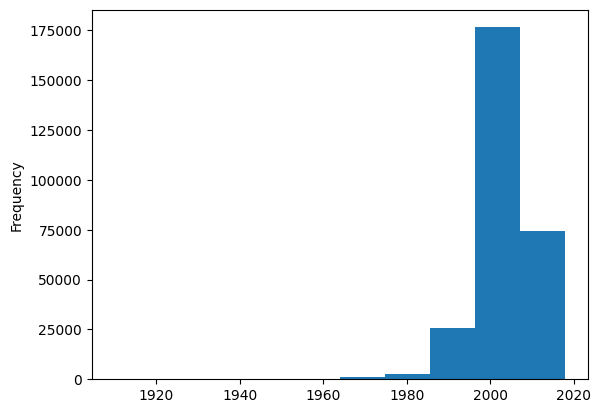

In [34]:
df['yearOfRegistration'].plot(kind = "hist")

<Axes: ylabel='Density'>

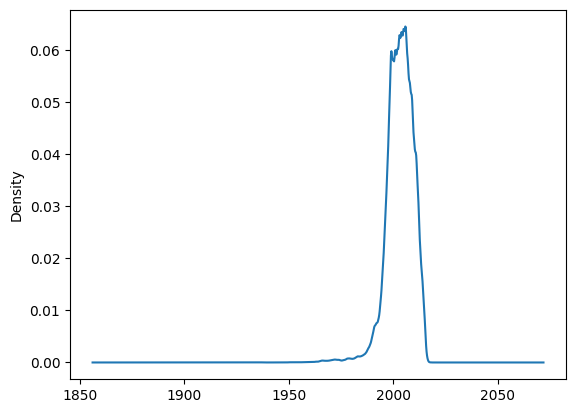

In [43]:
df['yearOfRegistration'].plot(kind = "kde") 
# yearofRegistration is Left Skewed Distribution because more data points on the right side and the long tail extending to the left side.

# from the above in the year 2000 to 2020 we see that more\
#                                 registrations are occured and the year b/w 1970 to 1980 less registrations are occured 

In [35]:
df.reset_index(drop=True,inplace = True)

In [36]:
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-14,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,2016-03-14,0,90480,2016-04-05 12:47:46
1,2016-03-17,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,2016-03-17,0,91074,2016-03-17 17:40:17
2,2016-03-31,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,2016-03-31,0,60437,2016-04-06 10:17:21
3,2016-04-04,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650,test,limousine,1995,manuell,102,3er,150000,10,benzin,bmw,2016-04-04,0,33775,2016-04-06 19:17:07
4,2016-04-01,Peugeot_206_CC_110_Platinum,privat,Angebot,2200,test,cabrio,2004,manuell,109,2_reihe,150000,8,benzin,peugeot,2016-04-01,0,67112,2016-04-05 18:18:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280563,2016-03-27,Opel_Zafira_1.6_Elegance_TÜV_12/16,privat,Angebot,1150,control,bus,2000,manuell,0,zafira,150000,3,benzin,opel,2016-03-27,0,26624,2016-03-29 10:17:23
280564,2016-03-05,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,2016-03-05,0,26135,2016-03-11 18:17:12
280565,2016-03-19,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,2016-03-19,0,87439,2016-04-07 07:15:26
280566,2016-03-20,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,2016-03-20,0,40764,2016-03-24 12:45:21


 # 3) Create a plot based on the Variation of the price range by the vehicle type


<Axes: xlabel='vehicleType'>

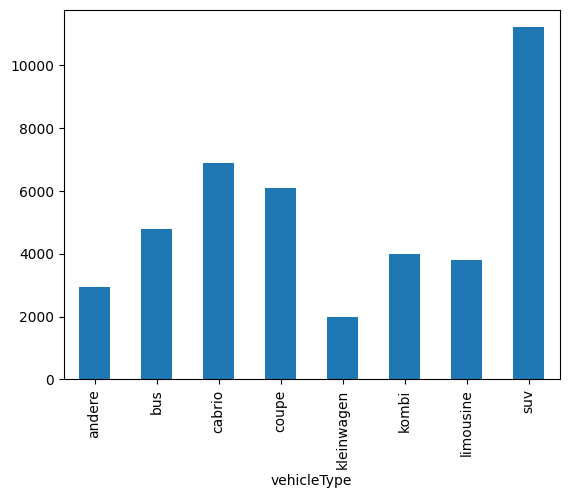

In [37]:
df.groupby(df['vehicleType'])['price'].median().plot(kind = 'bar')

In [ ]:
# above counclusion:
On an average,The highest price for a vehicle is 14000 for suv and lowest price for a vehicle is around 3000 for kleinwagen.

# 4) Find out Total count of vehicles by type available on ebay for sale.As well as create a visualization for the client


In [38]:
df["vehicleType"].value_counts()

vehicleType
limousine     82781
kleinwagen    61482
kombi         57953
bus           27073
cabrio        20164
coupe         15843
suv           13080
andere         2192
Name: count, dtype: int64

<Axes: xlabel='type of a vehicle', ylabel='no. of vehicles'>

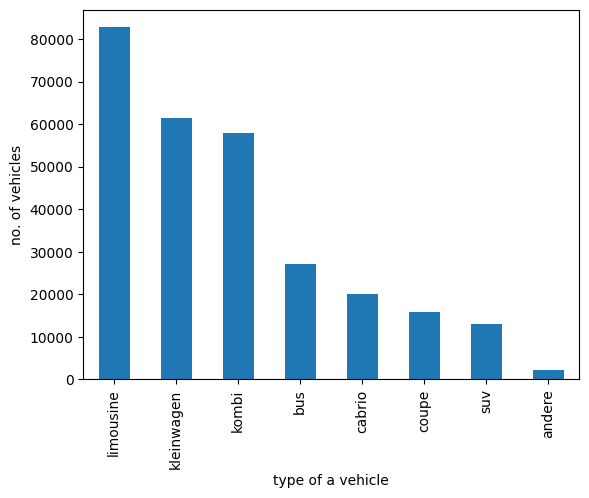

In [39]:
df["vehicleType"].value_counts().plot(kind = "bar",xlabel = "type of a vehicle",ylabel = "no. of vehicles")
# from the below plot ,limousine vehicle count is around 80000 above,which has the highest no of vehicles.
# Andere vehicle type has the least no of  vehicles and it's count is under 1000.

# 5) Is there any relationship between dollar_price and kilometer? (Explain with appropriate analysis)


# numerical vs numerical... scatter plot

<Axes: xlabel='price', ylabel='kilometer'>

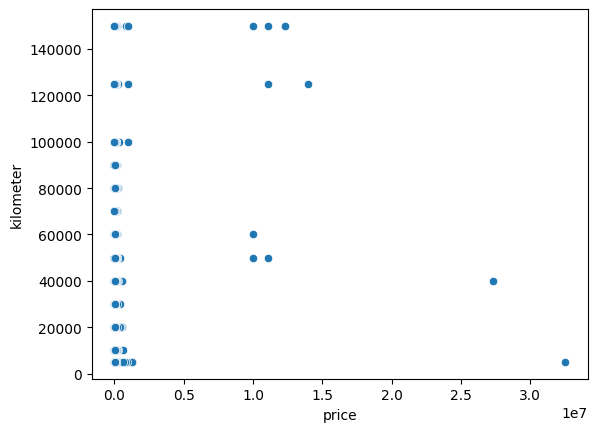

In [40]:
sns.scatterplot(df , x = "price",y = "kilometer" )
 

<Axes: >

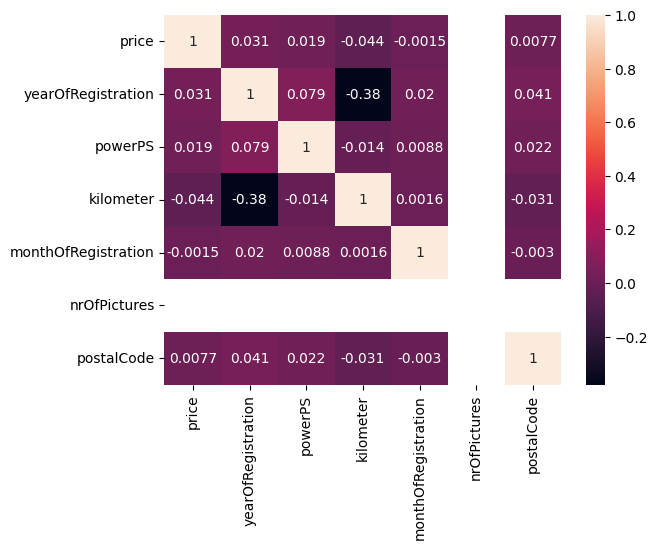

In [45]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [ ]:
#from the above we conclude..
#There is a weak negative relationship.